In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

0:愤怒
1:嫌弃
2:疑惑
3:喜悦
4:悲伤
5:惊讶
6:冷漠


In [2]:
face_data = pd.read_csv('fer2013.csv')

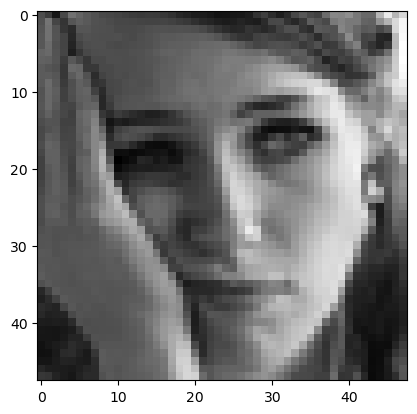

In [3]:
res = np.array(face_data.pixels[92].split(' '),dtype='int16')
plt.imshow(res.reshape(48,48),cmap='gray')

In [4]:
face_data.groupby('Usage').count()

,emotion,pixels
Usage,,
PrivateTest,3589,3589
PublicTest,3589,3589
Training,28709,28709


In [5]:
train = pd.concat([face_data[face_data.Usage=='PublicTest'],face_data[face_data.Usage=='Training']])
test = face_data[face_data.Usage=='PrivateTest']

In [6]:
x_train = train.iloc[:,1:-1]
y_train = train.iloc[:,0]
x_test = test.iloc[:,1:-1]
y_test = test.iloc[:,0]

In [7]:
y_train1 = np.array(y_train).reshape(-1,1)
y_train1.shape
list1 = []
for i in range(len(x_train.pixels)):
    m = x_train.pixels[i].split(' ')
    list1.append(m)
x_train1 = np.array(list1)
x_train1.shape

(32298, 2304)

In [8]:
y_test1 = np.array(y_test).reshape(-1,1)
y_test1.shape
list2 = []
for i in range(len(x_test.pixels)):
    m = x_test.pixels[x_test.index[i]].split(' ')
    list2.append(m)
x_test1 = np.array(list2)
x_test1.shape

(3589, 2304)

In [9]:
# 逻辑回归
lr = LogisticRegression()
lr.fit(x_train1,y_train1)
y_pred = lr.predict(x_test1)
acc = accuracy_score(y_test1,y_pred)
acc

0.22764001114516577

In [9]:
# SVC
model = SVC(kernel='rbf',C=10)
model.fit(x_train1,y_train1)

SVC(C=10)

In [10]:
import joblib
joblib.dump(model,'svc10.pkl')

['svc10.pkl']

In [11]:
y_pred = model.predict(x_test1)
acc = accuracy_score(y_test1,y_pred)
acc

0.18974644747840624